# Softmax prediction

Softmax is a combination of logistic regression and argmax:
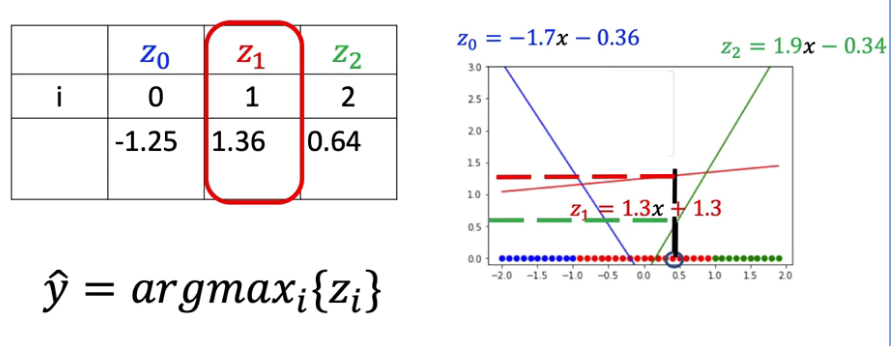

# Softmax function

## Custom module using nn.Module

In [1]:
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
import torch
torch.manual_seed(1)
# 2 dimensions input samples and 3 output classes
model = Softmax(2,3)

In [6]:
x = torch.tensor([[1.0, 2.0]])
z = model(x)
z

tensor([[-0.4053,  0.8864,  0.2807]], grad_fn=<AddmmBackward>)

In [7]:
_, yhat = z.max(1)
yhat

tensor([1])

In [12]:
X=torch.tensor([[1.0, 1.0],[1.0, 2.0],[1.0, -3.0]])
z = model(X)
z

tensor([[-0.0932,  0.5545, -0.1433],
        [-0.4053,  0.8864,  0.2807],
        [ 1.1552, -0.7730, -1.8396]], grad_fn=<AddmmBackward>)

In [13]:
_, yhat = z.max(1)
yhat

tensor([1, 1, 0])

# Softmax PyTorch

## Load Data

In [14]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


In [16]:
train_dataset = dsets.MNIST(root='./data', train = True, download = True, transform=transforms.ToTensor())

validation_dataset = dsets.MNIST(root='./data', train = False, download = True, transform=transforms.ToTensor())

In [17]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## Create Model

In [18]:
import torch.nn as nn

class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
    def forward(self, x):
        out = self.linear(x)
        return out

In [19]:
input_dim = 28 * 28
output_dim = 10
model = Softmax(input_dim, output_dim)

In PyTorch, when the loss criteria is specified as cross entropy loss, PyTorch will automatically perform Softmax classification based upon its inbuilt functionality.
Another note, the input for the loss criterion here needs to be a long tensor with dimension of n, instead of n by 1 which we had used previously for linear regression. 

In [20]:
criterion = nn.CrossEntropyLoss()

In [21]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100
accuracy_list = []

In [22]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)


# Train Model

In [26]:
from tqdm import tqdm

for epoch in tqdm(range(n_epochs)):
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28 * 28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
    correct = 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28 * 28))
        _, yhat = torch.max(z.data, 1)
        correct = correct+(yhat == y_test).sum().item()
    accuracy = correct / y.shape[0]
    accuracy_list.append(accuracy)

100%|██████████| 100/100 [10:03<00:00,  6.03s/it]


In [27]:
accuracy_list

[85.57,
 87.58,
 88.38,
 88.95,
 89.28,
 89.5,
 89.79,
 90.01,
 90.23,
 90.38,
 90.53,
 90.57,
 90.7,
 90.82,
 90.92,
 91.0,
 91.08,
 91.12,
 91.18,
 91.3,
 91.3,
 91.34,
 91.39,
 91.43,
 91.45,
 91.49,
 91.51,
 91.53,
 91.59,
 91.64,
 91.65,
 91.65,
 91.69,
 91.69,
 91.7,
 91.72,
 91.75,
 91.8,
 91.84,
 91.87,
 91.91,
 91.9,
 91.92,
 91.92,
 91.93,
 91.93,
 91.93,
 91.94,
 91.92,
 91.92,
 91.92,
 91.96,
 91.96,
 91.97,
 92.0,
 92.02,
 92.05,
 92.04,
 92.03,
 92.03,
 92.03,
 92.03,
 92.02,
 92.06,
 92.06,
 92.06,
 92.07,
 92.06,
 92.06,
 92.08,
 92.06,
 92.09,
 92.08,
 92.07,
 92.08,
 92.08,
 92.08,
 92.09,
 92.1,
 92.1,
 92.11,
 92.13,
 92.16,
 92.18,
 92.18,
 92.19,
 92.19,
 92.19,
 92.2,
 92.19,
 92.19,
 92.21,
 92.23,
 92.25,
 92.25,
 92.25,
 92.26,
 92.25,
 92.25,
 92.25,
 92.26,
 92.27,
 92.28,
 92.29,
 92.29,
 92.28,
 92.28,
 92.31,
 92.31,
 92.31,
 92.29,
 92.29,
 92.3,
 92.29,
 92.29,
 92.29,
 92.3,
 92.29,
 92.29,
 92.29,
 92.29,
 92.28,
 92.28,
 92.27,
 92.27,
 92.25,
 92.24

## View Results

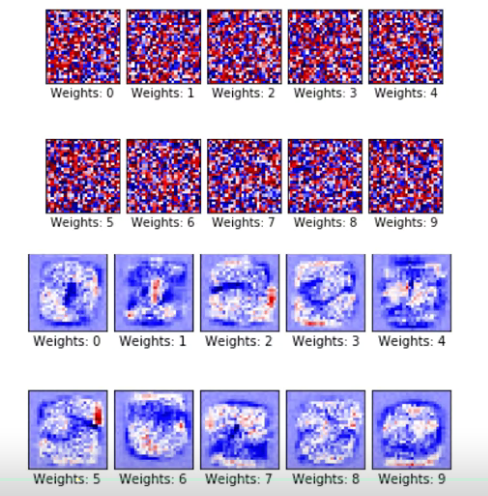